<a href="https://colab.research.google.com/github/Vaibhav543/Applied_AI/blob/main/Haberman_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust

In [2]:
data=pd.read_csv("/content/haberman.csv")
data

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
data.columns="Age_at_time_of_operation","Year_of_Operation","Auxilliary_Nodes_Detected","Survival_Status"
data["Survival_Status"].replace([1,2],["Survive","Die"],inplace=True)

In [4]:
data

,Age_at_time_of_operation,Year_of_Operation,Auxilliary_Nodes_Detected,Survival_Status
0,30,62,3,Survive
1,30,65,0,Survive
2,31,59,2,Survive
3,31,65,4,Survive
4,33,58,10,Survive
...,...,...,...,...
300,75,62,1,Survive
301,76,67,0,Survive
302,77,65,3,Survive
303,78,65,1,Die


In [5]:
'''Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year '''

"Attribute Information:\n\nAge of patient at time of operation (numerical)\nPatient's year of operation (year - 1900, numerical)\nNumber of positive axillary nodes detected (numerical)\nSurvival status (class attribute)\n1 = the patient survived 5 years or longer\n2 = the patient died within 5 year "

In [6]:
data["Survival_Status"].value_counts()

Survive    224
Die         81
Name: Survival_Status, dtype: int64

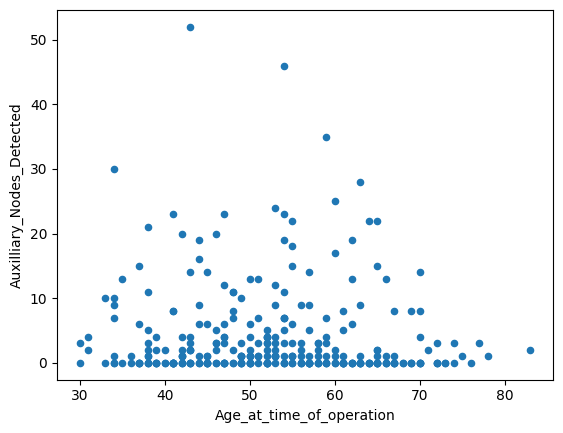

In [7]:
#2D Scatter Plot
data.plot(kind='scatter',x='Age_at_time_of_operation',y='Auxilliary_Nodes_Detected')
plt.show()

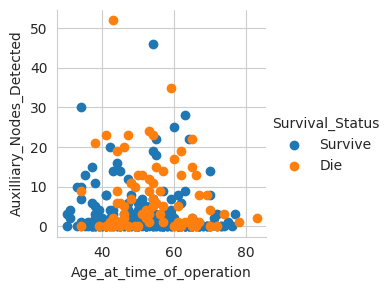

In [8]:
#2D Scatter Plot with with Color Coding for Target Variable.
sn.set_style("whitegrid");
g=sn.FacetGrid(data,hue="Survival_Status",height=3,sharex=True, sharey=True)  #Initialize the FacetGrid object with the dataset and the variables that are used to structure the grid.
g.map(plt.scatter,"Age_at_time_of_operation","Auxilliary_Nodes_Detected") #Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe()
g.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


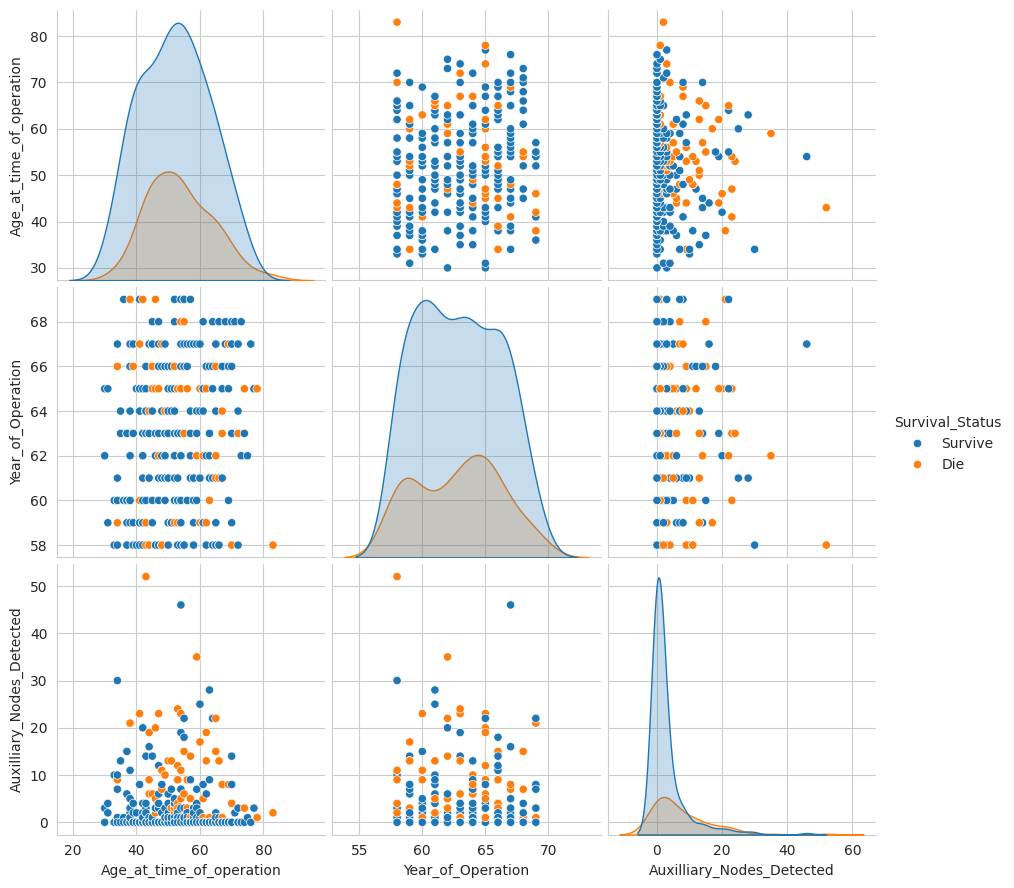

In [9]:
#Pair Plot- pairwise 2D scatter plot
sn.set_style("whitegrid")
sn.pairplot(data,hue="Survival_Status",size=3)
plt.show()

In [10]:
'''
https://ajaytech.co/facet-grid/

g = sns.FacetGrid(tips, col="time")
g.map(sns.scatterplot, x="total_bill", y="tip",hue="sex")

g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")
g.add_legend()

map function expects positional & keyword arguments.
'''

'\nhttps://ajaytech.co/facet-grid/\n\ng = sns.FacetGrid(tips, col="time")\ng.map(sns.scatterplot, x="total_bill", y="tip",hue="sex")\n\ng = sns.FacetGrid(tips, col="time",  row="sex")\ng.map_dataframe(sns.histplot, x="total_bill")\ng.add_legend()\n\nmap function expects positional & keyword arguments.\n'

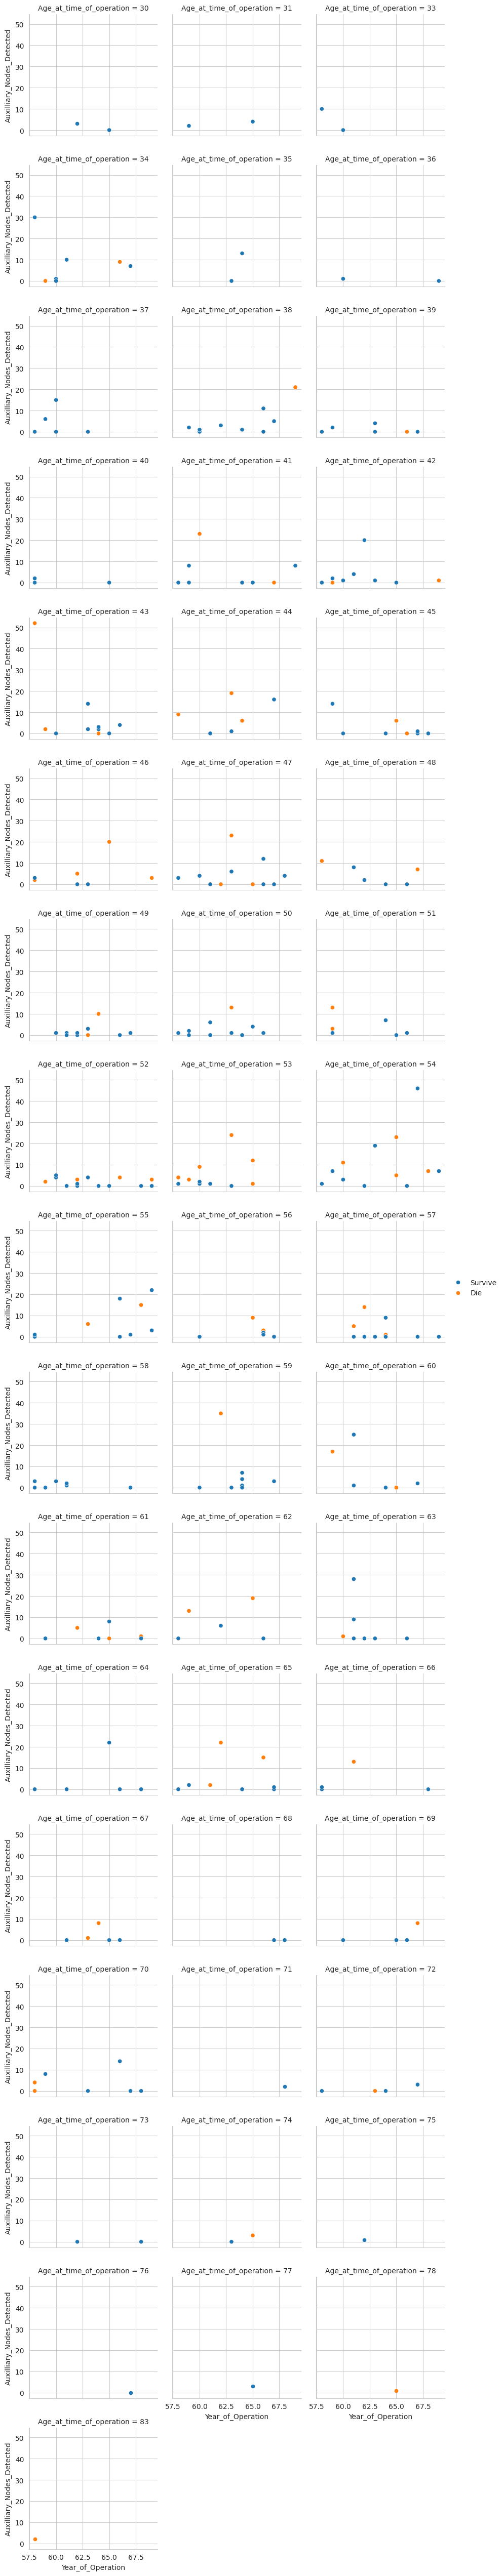

In [11]:
g=sn.FacetGrid(data,col='Age_at_time_of_operation',col_wrap=3) #returns the object ‘g1’ and creates facets.Based on the FacetGrid() function and the graph gets partitioned into multiple subplots based on the levels of the categorical variables.It results in multiple individual facets/subplots based on values in the categorical variable. In order to plot on the facets the map() method is called.We specify the plotting function to be applied to each subset by calling the map() method on the FacetGrid object
g.map(sn.scatterplot,"Year_of_Operation","Auxilliary_Nodes_Detected",hue=data["Survival_Status"]) #logic for extracting data and passing the relevant data to the plotting function.Here different colors indicate different categories of the ‘hue’ variable.
g.add_legend() #FacetGrid.map() requires a positional  argument mapping.It also accepts keyword arguments.


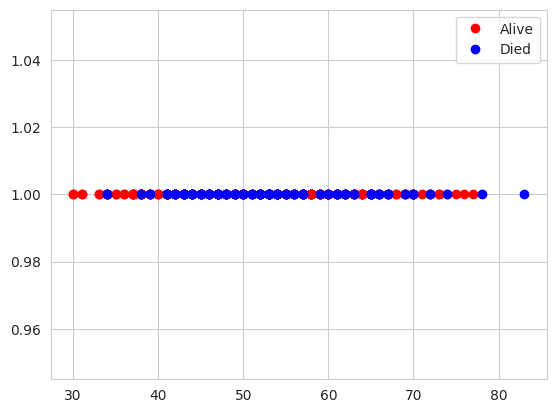

In [12]:
#1d Scatter Plot

alive_data=data.loc[data["Survival_Status"]=="Survive"]
died_data=data.loc[data["Survival_Status"]=="Die"]
plt.plot(alive_data["Age_at_time_of_operation"],np.ones_like(alive_data["Age_at_time_of_operation"]),"ro",label="Alive")
plt.plot(died_data["Age_at_time_of_operation"],np.ones_like(died_data["Age_at_time_of_operation"]),"bo",label="Died")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


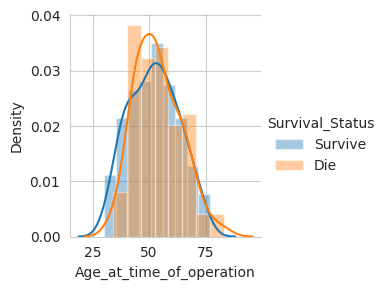

In [13]:
#Histogram(1D Scatter Plot)
#PDF is smoothed form of historgram (Percentage of data points that lie between two x values)
g1=sn.FacetGrid(data,hue="Survival_Status")
g1.map(sn.distplot,"Age_at_time_of_operation")
g1.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


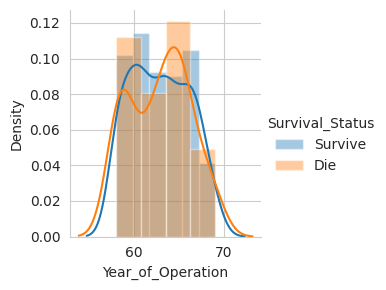

In [14]:
g1=sn.FacetGrid(data,hue="Survival_Status")
g1.map(sn.distplot,"Year_of_Operation")
g1.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


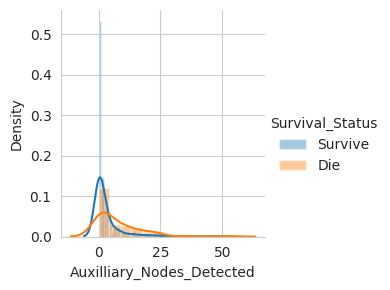

In [15]:
g1=sn.FacetGrid(data,hue="Survival_Status")
g1.map(sn.distplot,"Auxilliary_Nodes_Detected") #distplot: distribution plot.It represents the overall distribution of continuous data variables.It depicts the data by a histogram.It represents data distribution of a variable against the density distribution.i.e.univariate distribution of data.
g1.add_legend()
plt.show()

Histogram count at each bin:  [0.01044833 0.02279635 0.02659574 0.01994681 0.03514438 0.03514438
 0.01994681 0.0237462  0.01329787 0.00569909]
bin_edges:  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF:  [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
CDF:  [0.04910714 0.15625    0.28125    0.375      0.54017857 0.70535714
 0.79910714 0.91071429 0.97321429 1.        ]


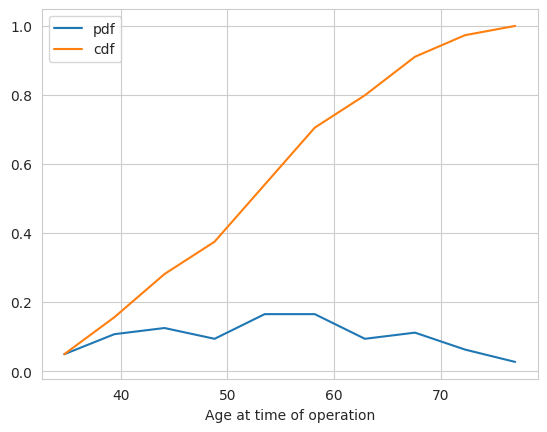

In [16]:
#PDF(Percentage of data points that lie between two x values)
#PDF used to count frequency of data points in each window

count,bin_edges=np.histogram(alive_data["Age_at_time_of_operation"],bins=10,density=True)
print("Histogram count at each bin: ",count)
print("bin_edges: ",bin_edges)
pdf=count/(sum(count))
print("PDF: ", pdf)

#CDF(Percentage of data points that are below an x-value)

cdf=np.cumsum(pdf)
print("CDF: ",cdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel("Age at time of operation")
plt.legend()

In [17]:
#Mean,Median,Variance,Standard Deviation
#The percentile is used to calculate the percentile of the given data (array) along the specified axis.
#A percentile is defined as a score at or below which a given percentage falls
print("Mean: ",np.mean(alive_data["Age_at_time_of_operation"]))
print("Median: ",np.median(alive_data["Age_at_time_of_operation"]))
print("Std deviation: ",np.std(alive_data["Age_at_time_of_operation"]))
print("\nQuantiles")
print(np.percentile(alive_data["Age_at_time_of_operation"],np.arange(0,100,25)))

print("\n90 Percentiles")
print(np.percentile(alive_data["Age_at_time_of_operation"],90)) #axis = 0 means along the column and axis = 1 means working along the row.It returns nth Percentile of the array (a scalar value if axis is none)or array with percentile values along specified axis.

Mean:  52.11607142857143
Median:  52.0
Std deviation:  10.913004640364278

Quantiles
[30. 43. 52. 60.]

90 Percentiles
67.0


In [18]:
print ("\nMedian Absolute Deviation")
print(robust.mad(alive_data["Age_at_time_of_operation"]))


Median Absolute Deviation
13.343419966550417


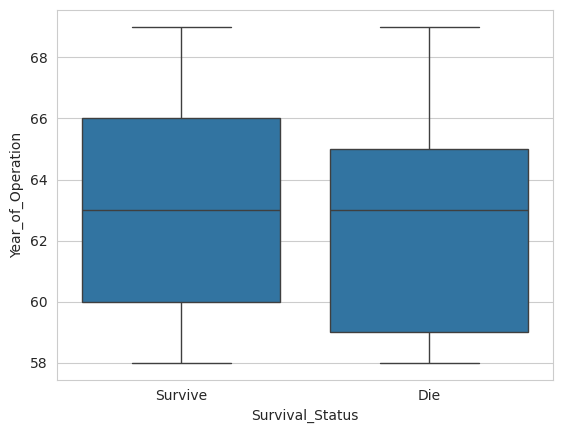

In [19]:
#1D Scatter Plot
'''
Box Plot is the visual representation of the depicting groups of numerical data through their quartiles.
It captures the summary of the data efficiently with a simple box and whiskers.
Color saturation refers to the intensity of color in an image. As the saturation increases, the colors appear to be more pure. As the saturation decreases, the colors appear to be more washed-out or pale.
palette argument controls the colors of the box plots
A box plot consist of 5 things.
Minimum
First Quartile or 25%
Median (Second Quartile) or 50%
Third Quartile or 75%
Maximum'''

sn.boxplot(x="Survival_Status",y='Year_of_Operation',data=data)
plt.show()

<Axes: xlabel='Year_of_Operation', ylabel='Age_at_time_of_operation'>

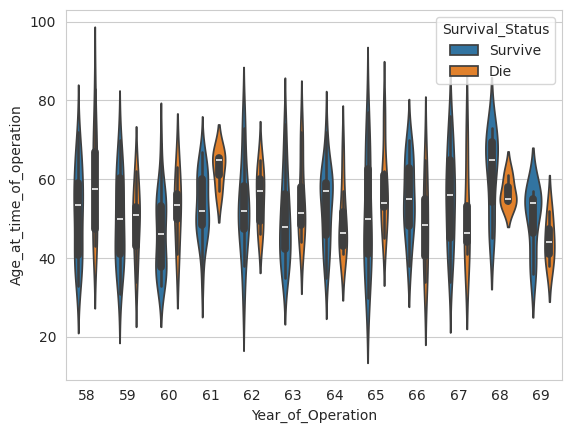

In [20]:
#Violin Plot - It combines benefits of both PDF & Box Plot.
#It allows user to draw box-plot along with kernel desnsity estimate
#violin plots depict summary statistics and the density of each variable.
#On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.
#Kernel Density Estimator (KDE) provides a rational and visually pleasant representation of the data distribution.It is used to estimate the probability density of a data sample.
#Kernel density estimation/Density Curve is a nonparametric model( nonparametric estimation does not assume that data is drawn from a known distribution. Rather, nonparametric models determine the model structure from the underlying data) used for estimating probability distributions.
#As we increase bandwidth, points further from our location are included. This results in a smoother distribution.

sn.set_style('whitegrid')
sn.violinplot(y='Age_at_time_of_operation',x='Year_of_Operation',hue='Survival_Status',data=data,dodge=True)

<Axes: xlabel='Year_of_Operation', ylabel='Auxilliary_Nodes_Detected'>

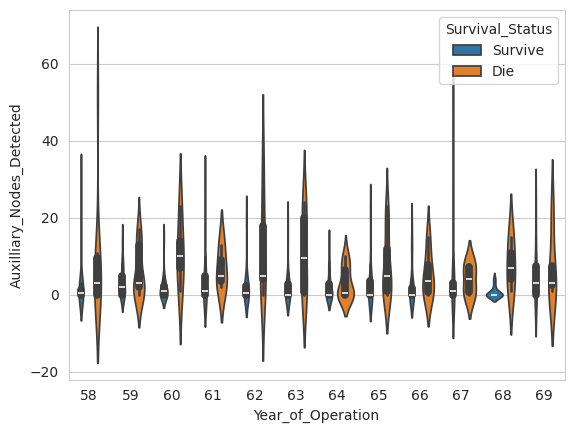

In [21]:
sn.violinplot(x='Year_of_Operation',y='Auxilliary_Nodes_Detected',hue='Survival_Status',data=data)

<Axes: xlabel='Auxilliary_Nodes_Detected', ylabel='Density'>

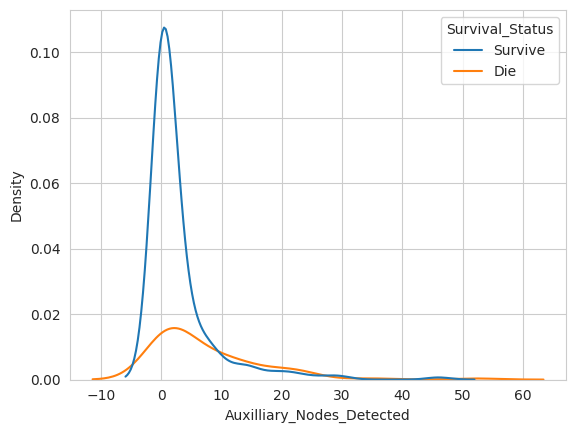

In [22]:
#Kernel Density Plot
sn.kdeplot(data=data,x='Auxilliary_Nodes_Detected',hue='Survival_Status')

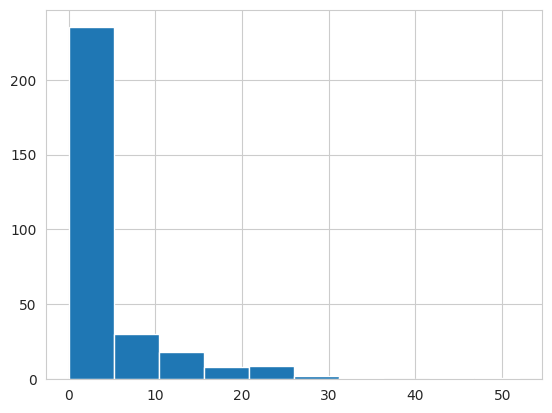

In [25]:
plt.hist(data=data,x='Auxilliary_Nodes_Detected')
plt.show()

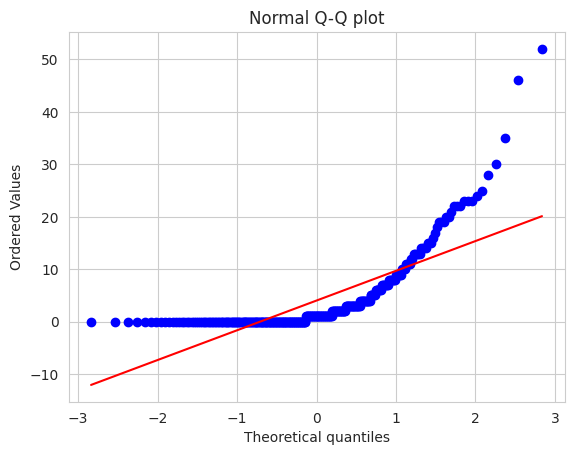

In [34]:
##Q-Q Plot
#The quantile-quantile( q-q plot) plot is a graphical method for determining if a dataset follows a certain probability distribution or whether two samples of data came from the same population or not.
#If the points on the plot fall approximately along a straight line, it suggests that your dataset follows the assumed distribution.
import scipy.stats as stats

stats.probplot(data['Auxilliary_Nodes_Detected'],dist='norm',plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()